In [2]:
import numpy as np
import pylab as pl
from scipy.optimize import curve_fit

 $\lambda$ =  645.3380003825753 $\pm$ 1.1212254367534187  sin$	heta_i$ =  0.9998207771030355 $\pm$ 7.110705458865119e-06


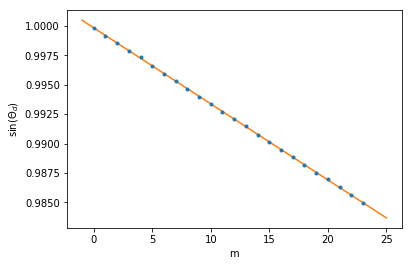

$\chi^{2}$ 25.54757020568392 22


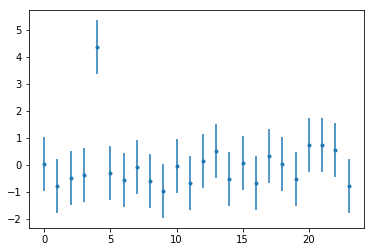

 $\lambda$ =  618.638301859127 $\pm$ 0.9500448414036838  sin$	heta_i$ =  0.9998537395627307 $\pm$ 6.378148804347364e-06


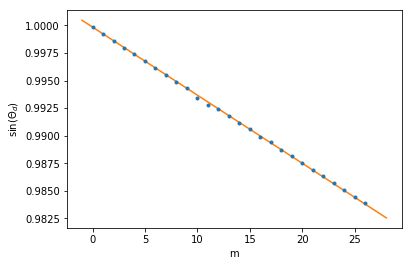

$\chi^{2}$ 57.78087128402443 25


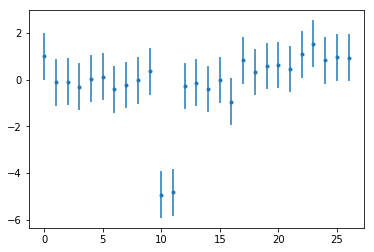

 $\lambda$ =  636.9354737710099 $\pm$ 1.1043597456183025  sin$	heta_i$ =  0.9998390445499954 $\pm$ 6.832165469134189e-06


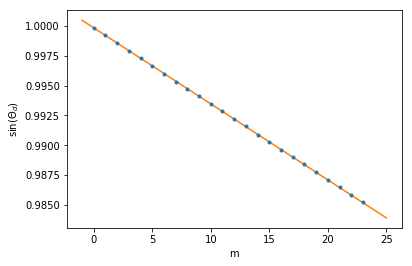

$\chi^{2}$ 4.672541564725352 22


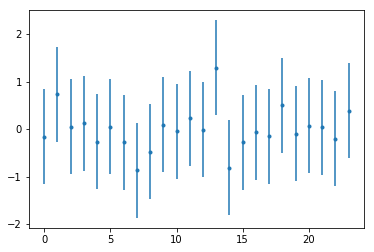

media =  631.945910320136 $\pm$ 0.605969929902052


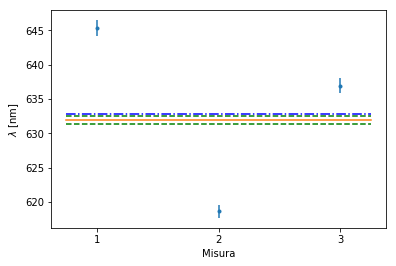

[618.63830186 636.93547377] [0.95004484 1.10435975]


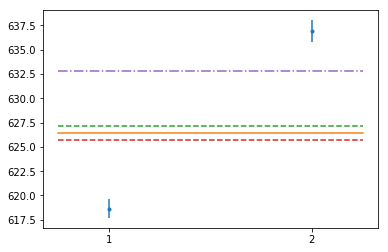

626.4202217750492 0.7202146685214231


In [25]:
def lineare (x, m, q):
    return m*x + q

def weighted_average(y, dy):
    """Weighted average of a list of measurement.
    """
    S = Sy = 0.
    for yi, dyi in zip(y, dy):
        wi = (1./dyi)**2.
        S += wi
        Sy += wi*yi
    q = Sy/S
    dq = (1./S)**0.5
    return q, dq

#DATI
D = 2.22   
dD = 0.05 #metri ho provato anche con 3 ma gli errori vengono troppo piccoli, sono presenti molti errori sistematici...
dh = 1.       #mm 
passo_ret = 1  #mm assunto senza errore
lung_onda = np.array([0.]*3)
d_lung_onda = np.array([0.]*3)
nome = np.array(['dati/A1.txt', 'dati/A2.txt', 'dati/A3.txt'])
immagini = np.array (['immagini/fit_A1.eps', 'immagini/fit_A2.eps', 'immagini/fit_A3.eps', 'immagini/media.eps', 'immagini/media1.eps', 'immagini/residui_norm_A1.eps', 'immagini/residui_norm_A2.eps', 'immagini/residui_norm_A3.eps' ])
valore_teorico = 632.8   #nm lunghezza d'onda nominale del laser HeNe

for i in range (0,3):
    h = np.loadtxt ( nome[i] , unpack = 'True')
    m = np.linspace (0, len(h)-1, len(h) , dtype = int ) #m parte da zero, il primo punto che abbiamo preso è quello riflesso
    #MASK SU DATI PRIMA PARTE
    #print(m)
    """
    mask = (m < 4) | (m > 10 )
    m = m[mask]
    print (m)
    mask = (h < 166) | (h > 270 )
    h = h[mask]
    print(h)
    """
    tan_theta_n = (h/D)/1000.
    d_tan_theta_n = tan_theta_n*np.sqrt( (dh/h)**2. + (dD/D)**2. )
    sin_theta_d = 1./np.sqrt(1. + (tan_theta_n)**2. )
    d_sin_theta_d = ( ( 1. + (tan_theta_n)**2. )**(-1.5) )*tan_theta_n*d_tan_theta_n
    #print ( (d_sin_theta_d/sin_theta_d)*100. ) 
    popt, pcov = curve_fit (lineare, m , sin_theta_d , sigma = d_sin_theta_d , absolute_sigma = 'True' ) #absolute sigma? cambia qualcosa mettere o no i param iniziali, io n  li ho messi.....
    print ( ' $\lambda$ = ', (-1.)*popt[0]*10**6. , '$\pm$',  np.sqrt( pcov.diagonal() )[0]*10**6., ' sin$\theta_i$ = ', popt[1], '$\pm$', np.sqrt( pcov.diagonal() )[1] ) 
    pl.errorbar (m , sin_theta_d , d_sin_theta_d, fmt = '.')
    x = np.linspace (-1. , len(h) + 1 , 1000)
    pl.plot ( x, lineare (x, *popt) )
    pl.xlabel('m')
    pl.ylabel("sin($\Theta_{d}$)")
    pl.savefig(immagini[i],format='eps')
    pl.show()
    
    #CHIQUADRO
    chi2 = ( ( ( sin_theta_d - lineare(m, *popt) )/ d_sin_theta_d )**2. ).sum()
    print ( '$\chi^{2}$' , chi2, len(sin_theta_d) - len(popt) )
    
    
    #RESIDUI NORMALIZZATI
    pl.errorbar( m, ( sin_theta_d - lineare (m, *popt) )/d_sin_theta_d , d_sin_theta_d/d_sin_theta_d , fmt = '.') 
    pl.savefig(immagini[i+5],format='eps')
    pl.show()
    
    lung_onda[i] = (-1.)*popt[0]*10**6.
    d_lung_onda[i] = np.sqrt( pcov.diagonal() )[0]*10**6.
    #print ( (d_sin_theta_d/sin_theta_d)*10**3. )
    
#CALCOLO MEDIA 
media, d_media = weighted_average( lung_onda, d_lung_onda)
print ( 'media = ', media, '$\pm$',  d_media )

n = np.array([1,2,3]) 
y = np.linspace (0.75, 3.25)
pl.errorbar ( n, lung_onda, d_lung_onda, fmt = '.' )
pl.plot ( y, y - y + media )
pl.plot ( y, y - y + (valore_teorico), linestyle = '-.', color = 'blue' )      #sembra che nn prende dash-dot e qualcosa nn funzionava...
pl.plot ( y, y - y + (media + d_media) , linestyle = 'dashed', color = 'green' )
pl.plot ( y, y - y + (media - d_media), linestyle = 'dashed', color = 'green' )  #come si fa insieme? risolvere problema
pl.xlabel('Misura')
pl.ylabel('$\lambda$ [nm]')
pl.savefig (immagini[3], format = 'eps')
pl.xticks(n)                       
#pl.xticks ( np.arange(2),('Tom', 'Dick') )        #rivedere, interessante....
#pl.xlim(0.75, 3.25)
pl.show()

#CALCOLO MEDIA CON I DUE VALORI BUONI
n1 = np.array([1,2])                      
z = np.linspace(0.75, 2.25)                       #numero samples default 50
print(lung_onda[1:], d_lung_onda[1:])
pl.errorbar(n1, lung_onda[1:], d_lung_onda[1:], fmt='.')
media1, d_media1 = weighted_average(lung_onda[1:], d_lung_onda[1:])
pl.plot(z, z - z + (media1) )
pl.plot(z, z - z + (media1 + d_media1), linestyle = 'dashed')
pl.plot(z, z - z + (media1 - d_media1), linestyle = 'dashed')
pl.plot(z, z - z + (valore_teorico), linestyle = '-.' ) 
pl.xticks(n1)
#pl.xlim(0.75, 2.25 )
pl.savefig(immagini[4],format='eps')
pl.show()
print (media1, d_media1)





    
    




Perchè A_1 sembra totalmente scazzato????? A
SOVRASTIMA ERRORI? GUARDATE GRAFICO DEI RESIDUI, CMQ PER I PRIMI DATI NON TORNA NIENTE!
Nell'ultimo grafico linea punto-linea viola è il valore teorico, la linea arancione è il valore medio e le linee tratteggiate vicine i valori a 1 deviazione standard. Ho provato anche a fare qualche mask per filtrare i dati del primo set di dati ma nnt.. 
